# Importing Necessary Libraries

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score

import os

# Data Loading

In [145]:
df = pd.read_csv('C:/Users/HP/Downloads/Monkeypox_cases.csv')

In [146]:
df.head()

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
0,England,2551,0,5,2,7
1,Portugal,710,0,0,0,34
2,Spain,4942,0,13,2,0
3,United States,7084,0,4,41,10
4,Canada,892,13,1,3,0


# Correlation Heatmap

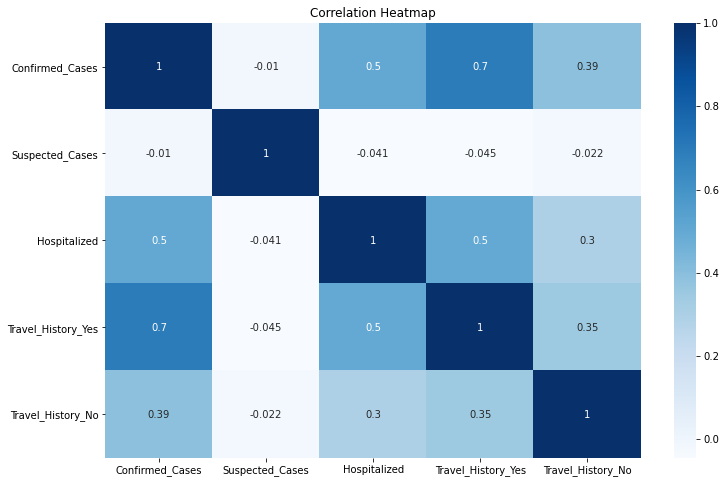

In [147]:
plt.figure(figsize=(12,8));
sns.heatmap(df.corr(),annot=True,cmap='Blues');
plt.title('Correlation Heatmap');

# We can see that People with Travel History have a positive correlation with the Hospitalization
# Also Hospitalized Cases have a positive correlation with the Confirmed Cases

# Distribution Curve

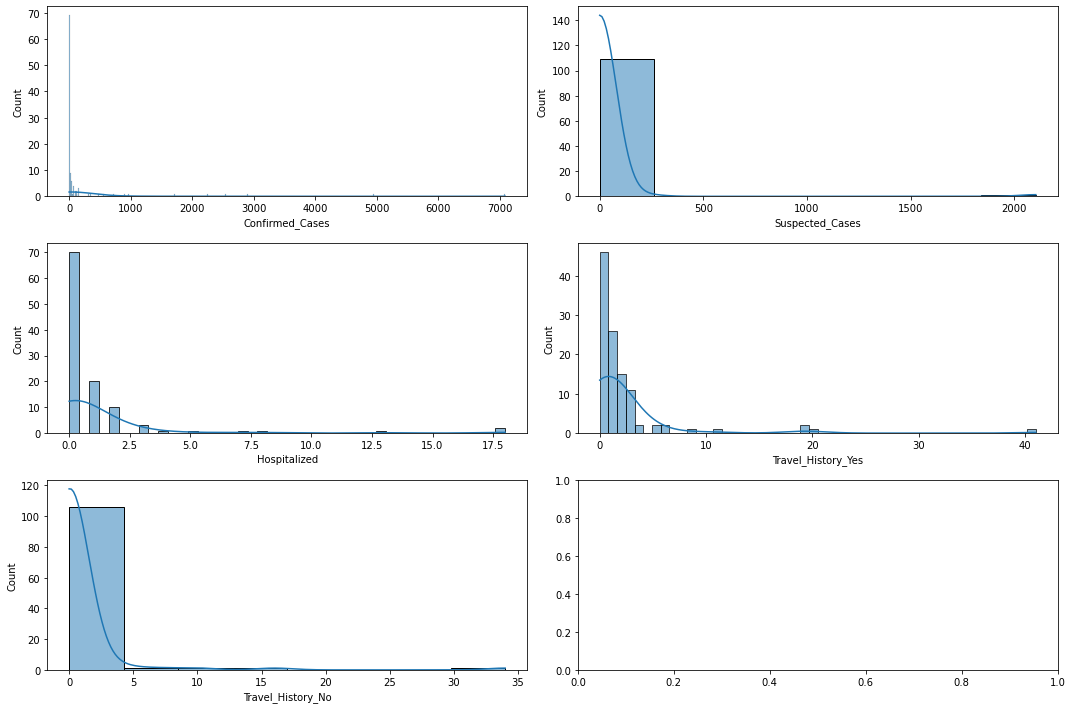

In [148]:
fig, axes = plt.subplots(3,2,figsize=(15,10))
for name, ax in zip(columns, axes.flatten()):
    sns.histplot(x=name,kde=True, data=df, ax=ax)
    
plt.tight_layout()

# All the columns are highly right skewed because of majority values being 0.So we normalize the dataset before modelling

# Normalization

In [149]:
X = df.drop(['Country','Confirmed_Cases'],axis=1)
y=df['Confirmed_Cases']

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [151]:
scaler = preprocessing.StandardScaler()

In [152]:
normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)

In [153]:
normalized_x_train.head()

,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
0,-0.121750,0.022712,-0.196941,-0.180396
1,-0.117282,-0.377027,-0.385320,-0.180396
2,-0.121750,-0.377027,-0.196941,-0.180396
3,-0.121750,-0.377027,-0.385320,-0.180396
4,-0.121750,-0.377027,-0.196941,-0.180396


# Before Vs After Scaling

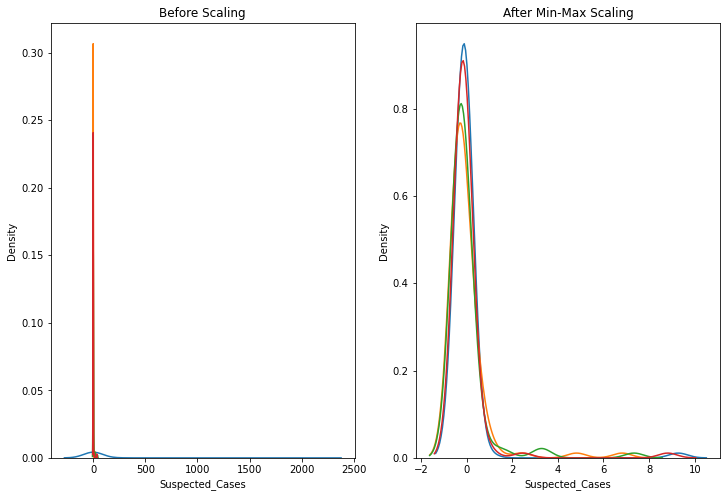

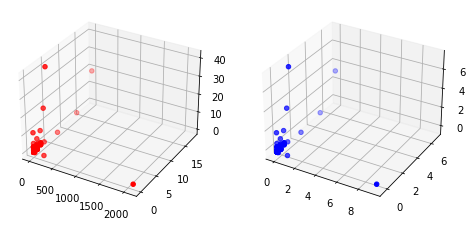

In [154]:
fig, (ob1, ob2) = plt.subplots(ncols=2,figsize=(12,8))
ob1.set_title('Before Scaling')
sns.kdeplot(X_train['Suspected_Cases'],ax=ob1)
sns.kdeplot(X_train['Hospitalized'],ax=ob1)
sns.kdeplot(X_train['Travel_History_Yes'],ax=ob1)
sns.kdeplot(X_train['Travel_History_No'],ax=ob1)

ob2.set_title('After Min-Max Scaling')
sns.kdeplot(normalized_x_train['Suspected_Cases'],ax=ob2)
sns.kdeplot(normalized_x_train['Hospitalized'],ax=ob2)
sns.kdeplot(normalized_x_train['Travel_History_Yes'],ax=ob2)
sns.kdeplot(normalized_x_train['Travel_History_No'],ax=ob2)
plt.show()

fig = plt.figure(figsize=(8,6))
ob3 = fig.add_subplot(121,projection='3d')
ob4 = fig.add_subplot(122,projection='3d')
ob3.scatter(X_train['Suspected_Cases'],X_train['Hospitalized'],X_train['Travel_History_Yes'],color='red')
ob4.scatter(normalized_x_train['Suspected_Cases'],normalized_x_train['Hospitalized'],normalized_x_train['Travel_History_Yes'],color='blue')
plt.show()

# Too many 0's are present currently so we cannot use log transformation for changing distribution but we can see that scaling didn't do much change to our data

In [155]:
normalized_x_test = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns)

# Modelling

In [156]:
d={}
def metric_scores(actual,predicted,name):
    
    """
    Function To evaluate and store the evaluation metric scores .
    Arguments to be passed:
    1. y_test
    2. y_pred
    3. name of the model
    """
    mae = mean_absolute_error(actual,predicted)
    mse = mean_squared_error(actual,predicted)
    mape = mean_absolute_percentage_error(actual,predicted)
    r2 = r2_score(actual,predicted)
    
    d[name]=[mae,mse,mape,r2]
    
    print('Mean Absolute Error is {:.3f}'.format(mae))
    print()
    print('Mean Squared Error is {:.3f}'.format(mse))
    print()
    print('Mean Absolute Percentage Error is {:.3f}'.format(mape))
    print()
    print('R Squared Error is {:.3f}'.format(r2))
    print()

In [157]:
def evaluate_model(x_test=None,y_test=None,model=None,name='Linear Regression'):
    
    """
    A function to make predictions, evaluate the model and plot the regression line!!!
    The function requires the following values:
    1. x_test
    2. y_test
    3. model object
    4. Name of the model 
    """
    
    predicted = model.predict(x_test)
    actual=y_test
    
    metric_scores(actual,predicted,name)
    plt.figure(figsize=(12,8))
    plt.scatter(actual, predicted, c='hotpink')

    p1 = max(max(predicted), max(actual))
    p2 = min(min(predicted), min(actual))
    plt.plot([p1, p2], [p1, p2],'#000066')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.title(name,fontsize=30)
    plt.axis('equal')
    plt.show()

# 1.Linear Regression

In [158]:
lr = LinearRegression()

In [159]:
lr.fit(normalized_x_train,y_train)

LinearRegression()

Mean Absolute Error is 359.021

Mean Squared Error is 318688.766

Mean Absolute Percentage Error is 52712202570556800.000

R Squared Error is 0.494



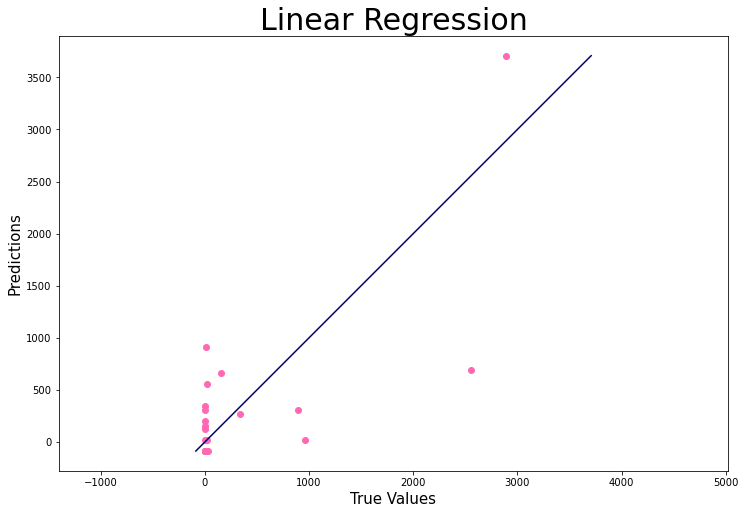

In [160]:
evaluate_model(x_test=normalized_x_test,y_test=y_test,model=lr,name='Linear Regression')

# 2.Decision Tree Regressor

In [161]:
DR = DecisionTreeRegressor(random_state=42)

In [162]:
DR.fit(normalized_x_train, y_train)

DecisionTreeRegressor(random_state=42)

Mean Absolute Error is 337.223

Mean Squared Error is 626407.083

Mean Absolute Percentage Error is 6536068290372119.000

R Squared Error is 0.006



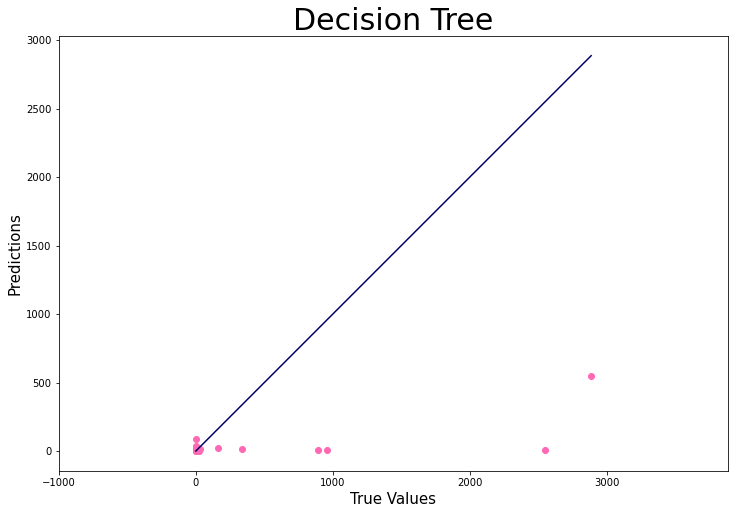

In [163]:
evaluate_model(x_test=normalized_x_test,y_test=y_test,model=DR,name='Decision Tree')

# 3.Random Forest Regressor

In [164]:
model=RandomForestRegressor(n_estimators=100, verbose=4)

In [165]:
model.fit(normalized_x_train, y_train)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


RandomForestRegressor(verbose=4)

Mean Absolute Error is 226.018

Mean Squared Error is 177817.401

Mean Absolute Percentage Error is 6658240593181670.000

R Squared Error is 0.718



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


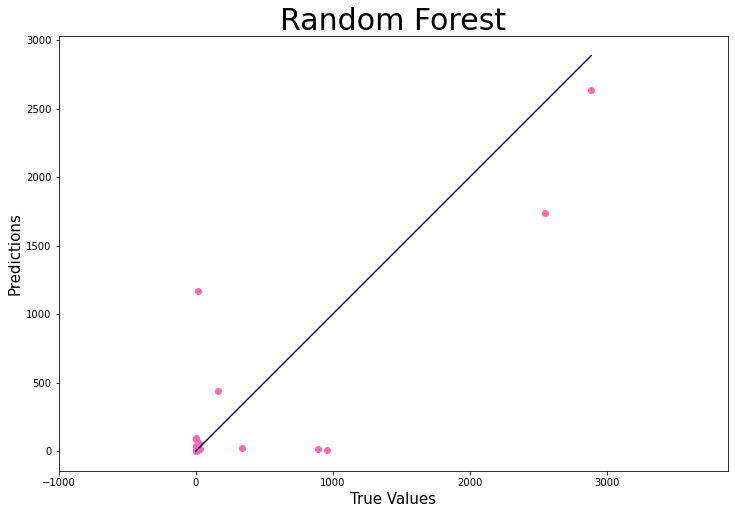

In [166]:
evaluate_model(x_test=normalized_x_test,y_test=y_test,model=model,name='Random Forest')

# Results

In [168]:
results = pd.DataFrame(d,index = ['MAE','MSE','MAPE','R2'])

In [169]:
results

,Linear Regression,Decision Tree,Random Forest
MAE,3.590205e+02,3.372226e+02,2.260182e+02
MSE,3.186888e+05,6.264071e+05,1.778174e+05
MAPE,5.271220e+16,6.536068e+15,6.658241e+15
R2,4.942841e-01,5.976908e-03,7.178279e-01


# Ranom Forest have very low MAE and MSE values. Also R2 value is highest for Random Forest. This implies Random Forest is the better model as comapred to Linear Regression and Decision Tree.